## Accessing dataset name data with the Planetary Computer STAC API

[dataset name](link/to/dataset/homepage) + high level intro.

MS PC datatypes, what this notebook shows.

This dataset is documented on the [Planetary Computer data catalog](https://planetarycomputer.microsoft.com/dataset/dataset name).

### Environment setup


In [1]:
from datashader.transfer_functions import shade, stack
from datashader.colors import Elevation
from pystac_client import Client
from xrspatial import hillshade

import planetary_computer as pc
import xarray as xr

### Query the dataset

dataset name data on the Planetary Computer is available <where>. We can define a few well known points of interest to find the corresponding DEM data. 

In [2]:
# Interesting places for looking at data
everest = [86.9250, 27.9881]
seattle = [-122.332, 47.6062]
grand_canyon = [-112.107676, 36.101690]
mount_fuji = [138.7274, 35.3606]
mont_blanc = [6.865000, 45.832778]

areas_of_interest = {"type": "Point", "coordinates": everest}

Execute a STAC API query for our selected point.

In [3]:
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")
nasadem = catalog.search(collections=["dataset name"], intersects=areas_of_interest)

items = [item for item in nasadem.get_items()]

print(f"Returned {len(items)} Items")

Returned 1 Items


What's actually getting returned? In the STAC API, each item has a list of assets with an href to where the underlying file is stored. Here we can see that dataset name items have <item contents>.

In [4]:
item = items[0]
print(item.assets)

{'elevation': <Asset href=https://nasademeuwest.blob.core.windows.net/nasadem-cog/v001/NASADEM_HGT_n27e086.tif>}


### Read and plot a dataset name tile

We found an asset that matched our seach, so we'll open the GeoTIFF directly with xarray and downlsample the data for easier plotting. The `datashader` render can handle rendering the whole array, but the resulting image size is quite large. 

In [5]:
signed_asset = pc.sign(item.assets["elevation"])

da = (
    xr.open_rasterio(signed_asset.href)
    .squeeze()
    .drop("band")[:-1, :-1]
    .coarsen({"y": 5, "x": 5})
    .mean()
)

Now we can generate a shaded relief using [xarray-spatial](https://xarray-spatial.org/user_guide/surface.html).

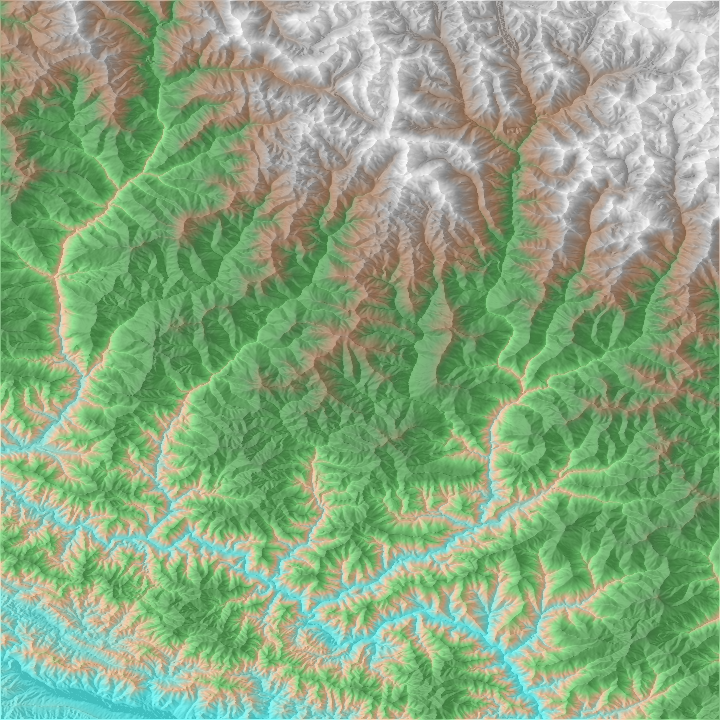

In [6]:
# Render the hillshade with a coloramp of the values applied on top
shaded = hillshade(da, azimuth=100, angle_altitude=50)
stack(shade(shaded, cmap=["white", "gray"]), shade(da, cmap=Elevation, alpha=128))